<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/Lab05_kernel-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




In [49]:
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X_train, X_val, y_train, y_val = train_test_split(data.data, data.target, random_state=0)
model = Ridge().fit(X_train, y_train)
perm_test = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)
print(perm_test.importances_mean)
print(type(data.data))
klasa=data.target
data = pd.DataFrame(data.data, columns=data.feature_names)
data["target"] = klasa
data = pd.DataFrame(data)
data.head()

'''iris=pd.DataFrame(data).iloc[:,[0,2,3,4]]
print(iris.head())
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = iris.iloc[:,0]
ys = iris.iloc[:,1]
zs = iris.iloc[:,2]
m = iris.iloc[:,3]

ax.scatter(xs, ys, zs, c=m)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('petal width (cm)')
plt.show() '''

[ 0.05035219 -0.00123606  0.75316559  0.3615811 ]
<class 'numpy.ndarray'>


"iris=pd.DataFrame(data).iloc[:,[0,2,3,4]]\nprint(iris.head())\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\nxs = iris.iloc[:,0]\nys = iris.iloc[:,1]\nzs = iris.iloc[:,2]\nm = iris.iloc[:,3]\n\nax.scatter(xs, ys, zs, c=m)\nax.set_xlabel('sepal length (cm)')\nax.set_ylabel('petal length (cm)')\nax.set_zlabel('petal width (cm)')\nplt.show() "

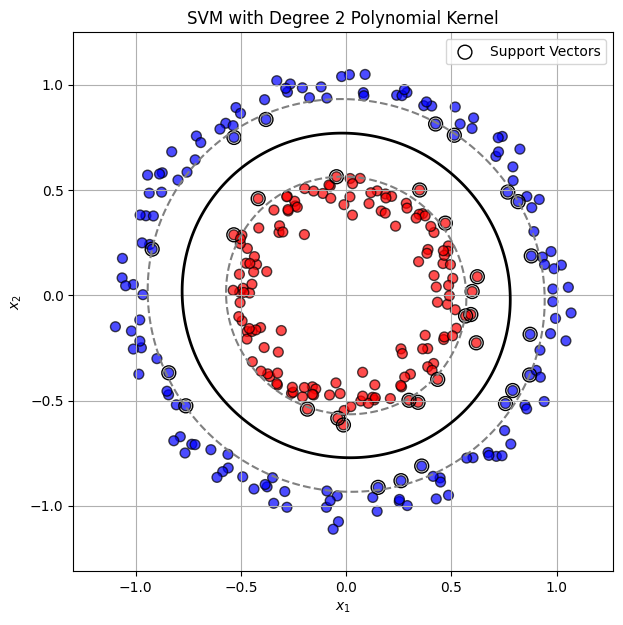

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()
